In [2]:
from PIL import Image
import numpy as np

In [3]:
#image = Image.open("sample6.ras")

In [4]:
def show_img(arr):
    from PIL import Image
    from tempfile import TemporaryFile
    from base64 import b64encode
    from IPython.core.display import HTML, display
    import  numpy as np
    
    img = Image.fromarray(arr, "L")
    img = img.transpose(Image.FLIP_TOP_BOTTOM)

    fp = TemporaryFile("r+b")
    img.save(fp, "PNG")
    fp.seek(0)
    encoded_url = "data:image/png;base64," + b64encode(fp.read())
    html = """
    <img src="%s"></img>
    """%encoded_url
    
    display(HTML(html))

In [26]:
raw = np.fromfile("/home/naoki/sample6.ras", dtype="uint8")

In [27]:
raw = raw[800:]
print len(raw) - 256*256
raw = raw.reshape((256, 256))

0


In [28]:
image = Image.fromarray(raw)
resized = image.resize((64, 64))
resized.save("resized.png")

In [29]:
def single(arr):
    new_arr = np.zeros(arr.shape[0:2], dtype="uint8")
    for i in range(0, arr.shape[0]):
        for j in range(0, arr.shape[1]):
            new_arr[i, j] = arr[i, j, 0]
    return new_arr

In [30]:
#image.mode = "L"
arr = np.asarray(resized)
#arr = single(arr)
arr[-1::-1].tofile("/home/naoki/exp_c/compiled/resized_sample.bin")

In [31]:
new_arr = np.asarray(image)

In [32]:
new_arr.shape

(256, 256)

In [33]:
new_arr[-1::-1].tofile("/home/naoki/exp_c/compiled/sample.bin")

In [34]:
new_arr = new_arr[-1::-1]

In [35]:
new_arr.tofile("sample.bin")

In [36]:
flatten = new_arr.reshape((new_arr.shape[0]*new_arr.shape[1]))

(array([  176.,    84.,   209.,  1013.,   560.,   462.,   617.,  1273.,
         3910.,  7975.,  7489.,  6021.,  5076.,  5152.,  7304.,  7387.,
         6494.,  4334.]),
 array([   3.        ,   15.94444444,   28.88888889,   41.83333333,
          54.77777778,   67.72222222,   80.66666667,   93.61111111,
         106.55555556,  119.5       ,  132.44444444,  145.38888889,
         158.33333333,  171.27777778,  184.22222222,  197.16666667,
         210.11111111,  223.05555556,  236.        ]),
 <a list of 18 Patch objects>)

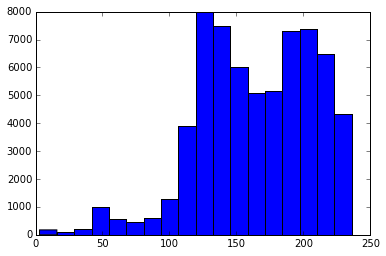

In [37]:
%matplotlib inline
from matplotlib import pylab
pylab.xlabel("")
pylab.hist(flatten, bins=18)

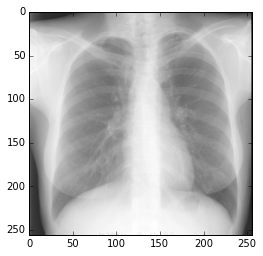

In [41]:
pylab.plt.imshow(new_arr, cmap=pylab.cm.gray)

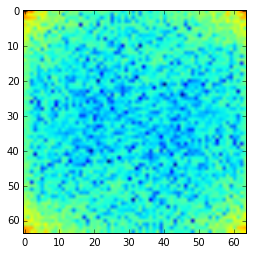

In [65]:
pylab.plt.imshow(np.log(np.abs(np.fft.fftn(new_arr))**2))

In [42]:
arr = np.fromfile("/home/naoki/exp_c/compiled/65abs.bin", dtype=np.uint8)

In [43]:
arr = arr.reshape((64, 64))

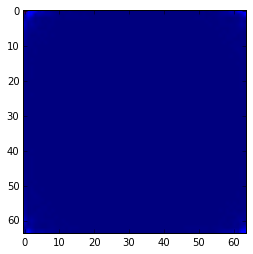

In [44]:
pylab.plt.imshow(arr)

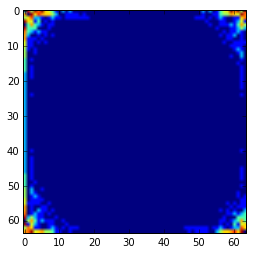

In [47]:
pylab.plt.imshow(np.log(arr**2+1))

In [6]:
import math
def show_bin_image(fname):
    arr = np.fromfile(fname, dtype=np.uint8)
    w = math.sqrt(arr.shape[0])
    arr = arr.reshape((w, w))
    show_img(arr)


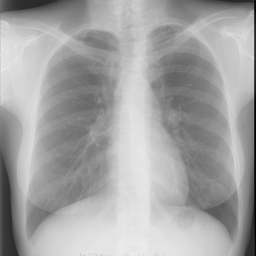

In [43]:
show_bin_image("/home/naoki/exp_c/compiled/sample.bin")


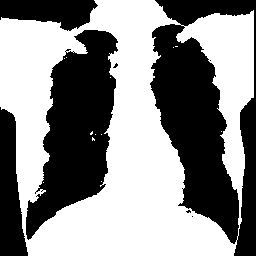

In [39]:
show_bin_image("/home/naoki/exp_c/compiled/62binarized.bin")


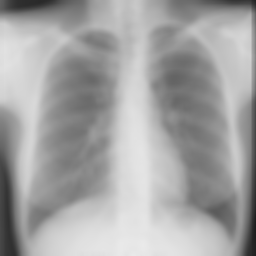

In [40]:
show_bin_image("/home/naoki/exp_c/compiled/63averaged.bin")

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



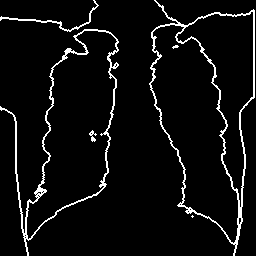

In [8]:
show_bin_image("/home/naoki/exp_c/compiled/64diffed.bin")

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



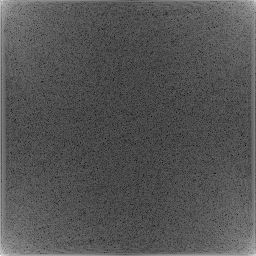

In [7]:
show_bin_image("/home/naoki/exp_c/compiled/66idtfed.bin")

In [9]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66idtfed.bin", dtype=np.uint8)

In [12]:
arr = arr.reshape((256, 256))

In [17]:
m1 = arr[0:128, 0:128]
m2 = arr[128:256, 0:128]
m3 = arr[128:256, 128:256]
m4 = arr[0:128, 128:256]

In [31]:
m21 = np.concatenate((m2, m1))
m43 = np.concatenate((m3, m4))
mat = np.concatenate((m43.transpose(), m21.transpose())).transpose()


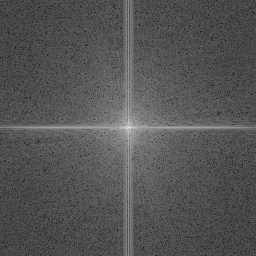

In [32]:
show_img(mat)

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



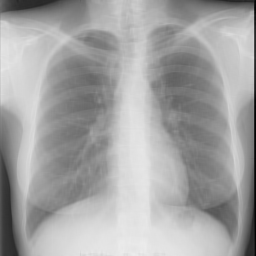

In [34]:
show_bin_image("/home/naoki/exp_c/compiled/66low.bin")

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



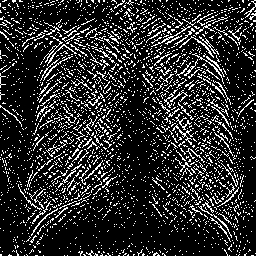

In [36]:
show_bin_image("/home/naoki/exp_c/compiled/66high.bin")

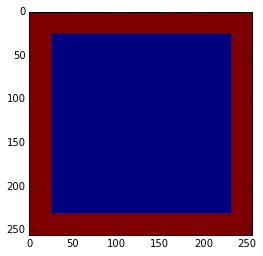

In [44]:
%matplotlib inline
from matplotlib import pylab
arr = np.fromfile("/home/naoki/exp_c/compiled/66low_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

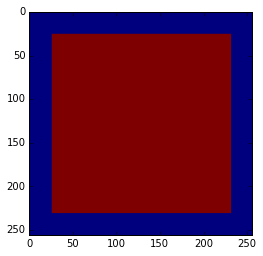

In [46]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66high_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



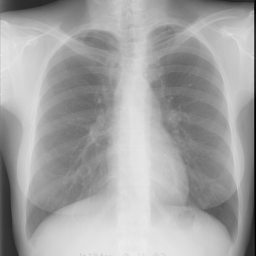

In [48]:
show_bin_image("/home/naoki/exp_c/compiled/66low.bin")

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



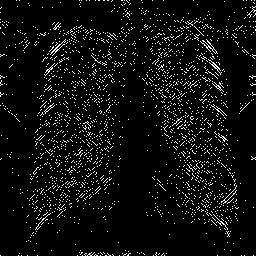

In [49]:
show_bin_image("/home/naoki/exp_c/compiled/66high.bin")

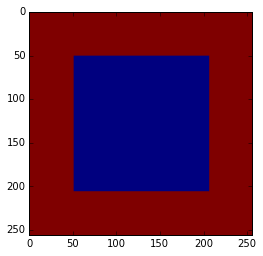

In [50]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66low_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

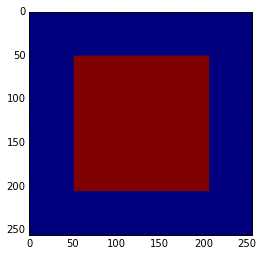

In [51]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66high_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



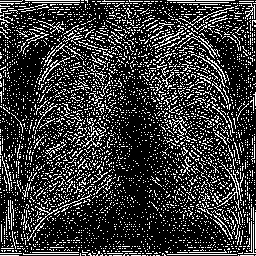

In [62]:
show_bin_image("/home/naoki/exp_c/compiled/66low.bin")

/home/naoki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



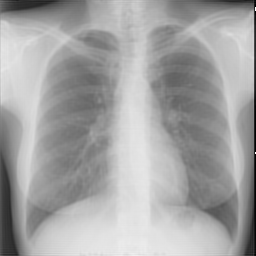

In [63]:
show_bin_image("/home/naoki/exp_c/compiled/66high.bin")

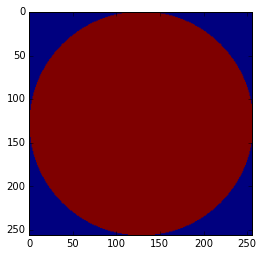

In [60]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66low_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

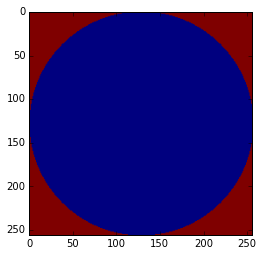

In [61]:
arr = np.fromfile("/home/naoki/exp_c/compiled/66high_filter.bin", dtype=np.uint8)
arr = arr.reshape((256, 256))
pylab.imshow(arr)

In [64]:
arr = np.zeros(shape=(256, 256), dtype=np.uint8)

In [67]:
for i in range(0, 256):
    for j in range(0, 256):
        x=i
        y=j
        if x**2 + y**2 < 128**2:
            arr[i, j] = 1
        elif (256-x)**2 + y**2 < 128**2:
            arr[i, j] = 1
        elif x**2 + (256-y)**2 < 128**2:
            arr[i, j] = 1            
        elif (256-x)**2 + (256-y)**2 < 128**2:
            arr[i, j] = 1
        else:
            arr[i, j] = 0

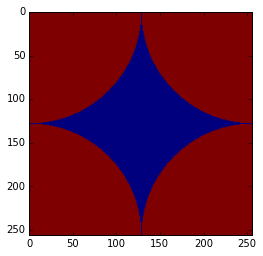

In [68]:
pylab.imshow(arr)